# COVID-19 Simulation by transentis consulting

This app contains an implementation of the SIR model, which was developed in 1927 by Kermack and McKendrick to model the spreading of epidemics. The dashboard was created by <a href="https://transentis.com/" target="_blank">Transentis consulting from Berlin</a>

The implementation here is roughly calibrated to the current situation in Germany (as of 27.3.2020). It illustrates the effects of social distancing in achieving the objective of keeping the strain on the health care system as small as possible.


__Assumptions:__

- Contact Rate: 20 persons. Defines how many people a person encounters per day in average.
- Infectivity: 2%. Defines the probability that a person becomes infected after contact with an infectious person.
- Intensive Care Needed: 0.2%. Measures the number of infected people who need intensive care.
- Intensive Care Available: 30,000 units. The number of intensive care units available.

## System Dynamics Dashboard for Covid-19

The SIR model is implemented in System Dynamics using the open-source <a href="http://bptk.transentis-labs.com/" target="_blank">BPTK-Py</a> framework.

The dashboard below lets you interactively modify the number of contacts per person and see how this influences the spread of the virus and what this means for German intensive care.

In [3]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

model = Model(starttime=1.0,stoptime=1500.0,dt=1.0,name='sir')

susceptible = model.stock("S")
infectious = model.stock("I")
recovered = model.stock("R")
deaths = model.stock("D")

susceptible.initial_value = 80000000.0
infectious.initial_value = 120.0
recovered.initial_value = 0.0
deaths.initial_value = 0.0

infection_rate = model.flow("IR")
recovery_rate = model.flow("RR")
death_rate = model.flow("DR")

contact_rate = model.converter("c")
total_population = model.converter("TP")
net_population = model.converter("N")
intensive_needed = model.converter("needed")
intensive_rate = model.constant("irate")
infectivity = model.constant("i")
intensive_available = model.constant("available")
lethality = model.constant("L")
average_duration = model.constant("d")

susceptible.equation = -infection_rate
infectious.equation = infection_rate - recovery_rate - death_rate
recovered.equation = recovery_rate
deaths.equation = death_rate

infectivity.equation = 0.02
intensive_rate.equation = 0.002
intensive_available.equation = 30000.0
lethality.equation = 0.001
average_duration.equation = 20.0

contact_rate.equation = 20.0 
total_population.equation = susceptible+infectious+recovered
net_population.equation = total_population-deaths
intensive_needed.equation =infectious*intensive_rate

infection_rate.equation = (contact_rate*susceptible*infectivity)*(infectious/total_population)
recovery_rate.equation = infectious/average_duration
death_rate.equation = infectious*lethality

import BPTK_Py
import pandas as pd
bptk = BPTK_Py.bptk()
bptk.register_model(model)

bptk.register_scenarios(
    scenarios ={
        "contactLargeGroups": {},
        "contactSmallGroups": {},
        "contactTwoPeople": {},
        "interactiveScenario":{}
    },
    scenario_manager="smSir")

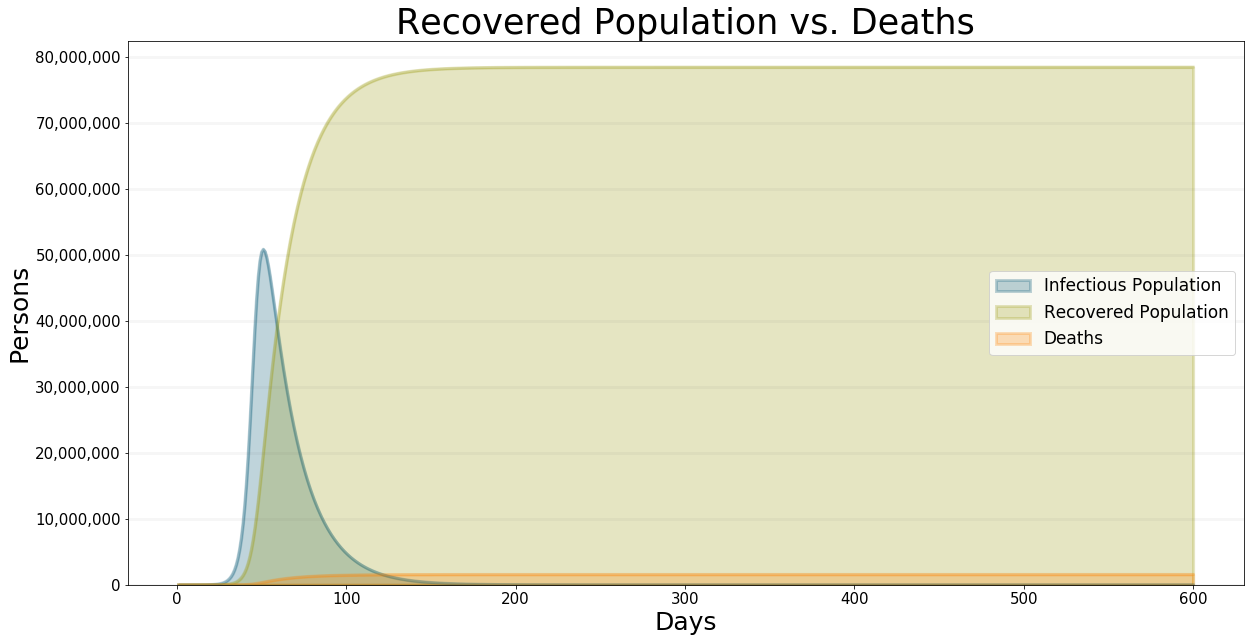

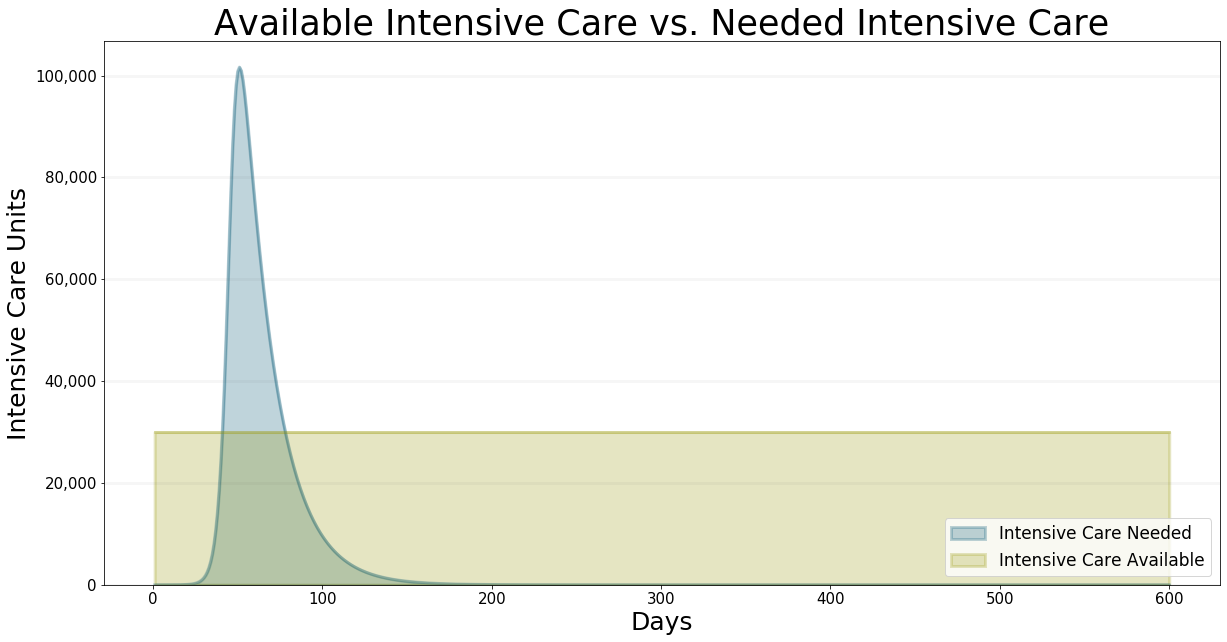

In [4]:
%run src/dashboard/sir_dashboard.ipy